해당 노트북은 YouTube [todaycode오늘코드](https://www.youtube.com/channel/UCLR3sD0KB_dWpvcsrLP0aUg) 강의를 기반으로 작성했습니다.

# 서울시에서 공개한 코로나19 발생동향 분석
* https://www.seoul.go.kr/coronaV/coronaStatus.do
* 해당 웹사이트 테이블 구조가 자주 바뀌는 점 염두


In [1]:
# 필요한 모듈 
import pandas as pd
import numpy as np

In [2]:
# 강의 설명 파일로 일단 진행! (2020년7월1일 기준 데이터!)
file_name = f'data/seoul-covid19_6_30_.csv'
# 최신 파일로는 추후에 진행해보자~
#file_name = f'data/seoul-covid19-2021_01_27.csv'

file_name

'data/seoul-covid19_6_30_.csv'

In [3]:
df = pd.read_csv(file_name)
df.shape

(1321, 7)

In [4]:
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항
0,1321,12830,6.30.,영등포구,-,영등포구 확진자 접촉,-
1,1320,12829,6.30.,관악구,-,확인 중,보라매병원
2,1319,12831,6.30.,영등포구,-,확인 중,중앙대학교병원
3,1318,12808,6.30.,관악구,-,강남구 역삼동 모임,보라매병원
4,1317,12809,6.30.,관악구,-,강남구 역삼동 모임,보라매병원


In [5]:
# 연번 기준으로 역순으로 정렬
df = df.sort_values(by="연번", ascending=False)
df

,연번,환자,확진일,거주지,여행력,접촉력,조치사항
0,1321,12830,6.30.,영등포구,-,영등포구 확진자 접촉,-
1,1320,12829,6.30.,관악구,-,확인 중,보라매병원
2,1319,12831,6.30.,영등포구,-,확인 중,중앙대학교병원
3,1318,12808,6.30.,관악구,-,강남구 역삼동 모임,보라매병원
4,1317,12809,6.30.,관악구,-,강남구 역삼동 모임,보라매병원
...,...,...,...,...,...,...,...
1316,5,9,1.31.,성북구,-,#5 접촉,서울의료원(퇴원)
1317,4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원)
1318,3,6,1.30.,종로구,-,#3 접촉,서울대학교병원(퇴원)
1319,2,5,1.30.,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원)


서울시 코로나 최초 발생은 1월24일 중국 우한시 여행자 

# 시각화 도구 불러오기

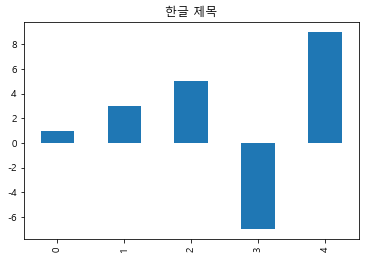

In [6]:
# matplotlib.pyplot을 이용한 한글폰트 설정
# plt.style.use로 "fivethirtyeight" 스타일 지정
import matplotlib.pyplot as plt
# 한글 설정 -> plt.rc 사용
plt.rc("font", family="Malgun Gothic") # Windows
#plt.rc("font", family="AppleGothic") # Mac

# 마이너스(-) 기호 표시 -> plt.rc 사용
plt.rc("axes", unicode_minus=False) 

# matplotlib 폰트 컬러 설정 -> plt.rcParams 사용 => 더 좋은 방법 없을까?
# plt.rcParams.update({"text.color": 'red',
#                     "axes.labelcolor": 'white',
#                     "xtick.color": 'white',
#                      "ytick.color": "white",})


pd.Series([1,3,5,-7,9]).plot.bar(title="한글 제목")


## 시각화 선명하게 설정하기

In [7]:
# retina를 지원한다면, 시각화 폰트를 좀 더 선명하게 볼 수 있음!
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

# 확진일

In [8]:
# 확진일 빈도수 체크
df["확진일"].value_counts()

3.10.    46
6.12.    30
6.06.    29
6.05.    27
3.9.     26
         ..
2.2.      1
4.20.     1
4.30.     1
3.3.      1
5.17.     1
Name: 확진일, Length: 131, dtype: int64

In [9]:
# 확진일 형태를 '2020-03-10' 와 같이 연-월-일로 변경
df["확진일자"] = pd.to_datetime("2020-" + df["확진일"].str.replace('.', '-'))
df[["확진일", "확진일자"]]

,확진일,확진일자
0,6.30.,2020-06-30
1,6.30.,2020-06-30
2,6.30.,2020-06-30
3,6.30.,2020-06-30
4,6.30.,2020-06-30
...,...,...
1316,1.31.,2020-01-31
1317,1.30.,2020-01-30
1318,1.30.,2020-01-30
1319,1.30.,2020-01-30


In [10]:
# 월만 추출하여 새로운 칼럼 생성
df["월"] = df["확진일자"].dt.month
df[["확진일", "확진일자", "월"]]

,확진일,확진일자,월
0,6.30.,2020-06-30,6
1,6.30.,2020-06-30,6
2,6.30.,2020-06-30,6
3,6.30.,2020-06-30,6
4,6.30.,2020-06-30,6
...,...,...,...
1316,1.31.,2020-01-31,1
1317,1.30.,2020-01-30,1
1318,1.30.,2020-01-30,1
1319,1.30.,2020-01-30,1


In [11]:
# 몇 번째 '주'인지 추출하여 새로운 칼럼 생성
df["주"] = df["확진일자"].dt.week
df[["확진일", "확진일자", "월", "주"]]

<ipython-input-11-801d439b830e>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df["주"] = df["확진일자"].dt.week


,확진일,확진일자,월,주
0,6.30.,2020-06-30,6,27
1,6.30.,2020-06-30,6,27
2,6.30.,2020-06-30,6,27
3,6.30.,2020-06-30,6,27
4,6.30.,2020-06-30,6,27
...,...,...,...,...
1316,1.31.,2020-01-31,1,5
1317,1.30.,2020-01-30,1,5
1318,1.30.,2020-01-30,1,5
1319,1.30.,2020-01-30,1,5


2020-01-24를 4주를 기준으로 1주씩 늘어남

## 선그래프 그리기

In [12]:
df["확진일자"].value_counts().sort_index()

2020-01-24     1
2020-01-30     3
2020-01-31     3
2020-02-02     1
2020-02-05     2
              ..
2020-06-26    17
2020-06-27    14
2020-06-28     7
2020-06-29     8
2020-06-30     8
Name: 확진일자, Length: 130, dtype: int64

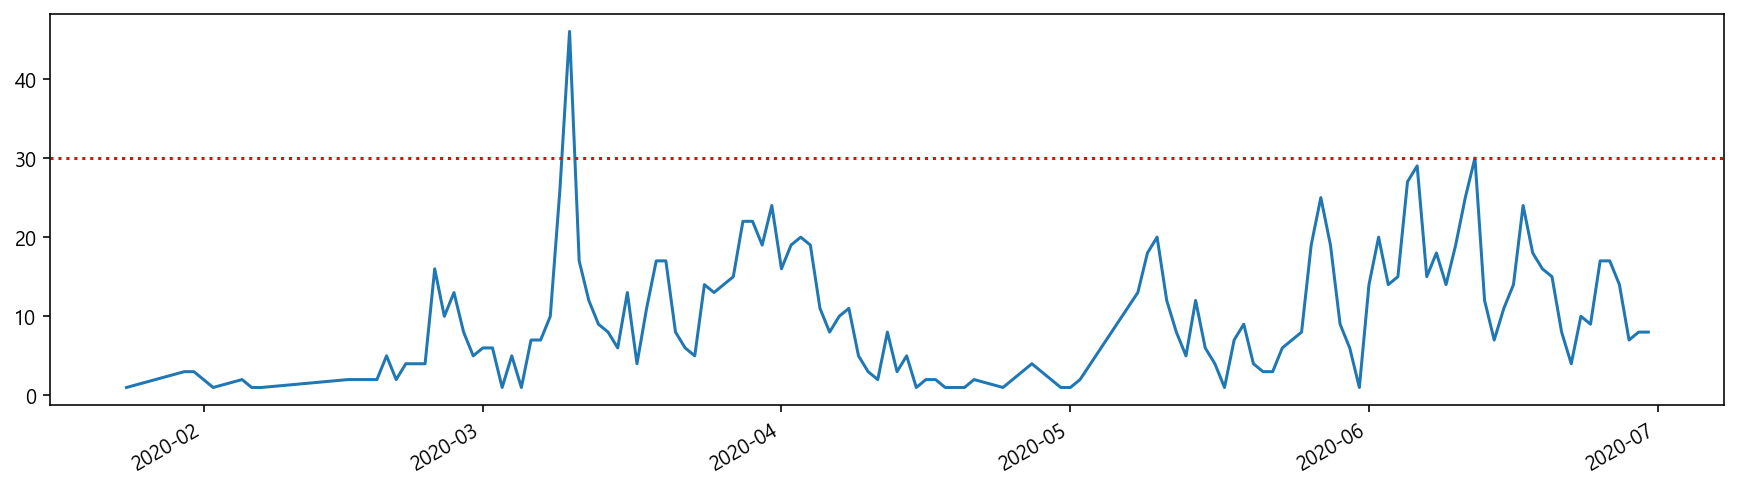

In [13]:
# df.plot()은 기본적으로 '선그래프'를 그린다!
df["확진일자"].value_counts().sort_index().plot(figsize=(15,4))
plt.axhline(30, color='red', linestyle=":")

3월 이후로 폭등, 4월, 5월이 지나면서 다소 증가, 6월이 지나면서 증가 추세

## 선그래프에 값 표시하기

In [14]:
df.sample()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주
1091,230,7923,3.12.,관악구,"스페인,체코",해외 접촉,서북병원(퇴원),2020-03-12,3,11


In [15]:
# 선그래프에 일자별로 20명이 넘어가는 확진자수를 표시해보자!
df["월일"] = df["확진일자"].astype(str).map(lambda x: x[-5:])

In [16]:
day_count = df["월일"].value_counts().sort_index()
day_count

01-24     1
01-30     3
01-31     3
02-02     1
02-05     2
         ..
06-26    17
06-27    14
06-28     7
06-29     8
06-30     8
Name: 월일, Length: 130, dtype: int64

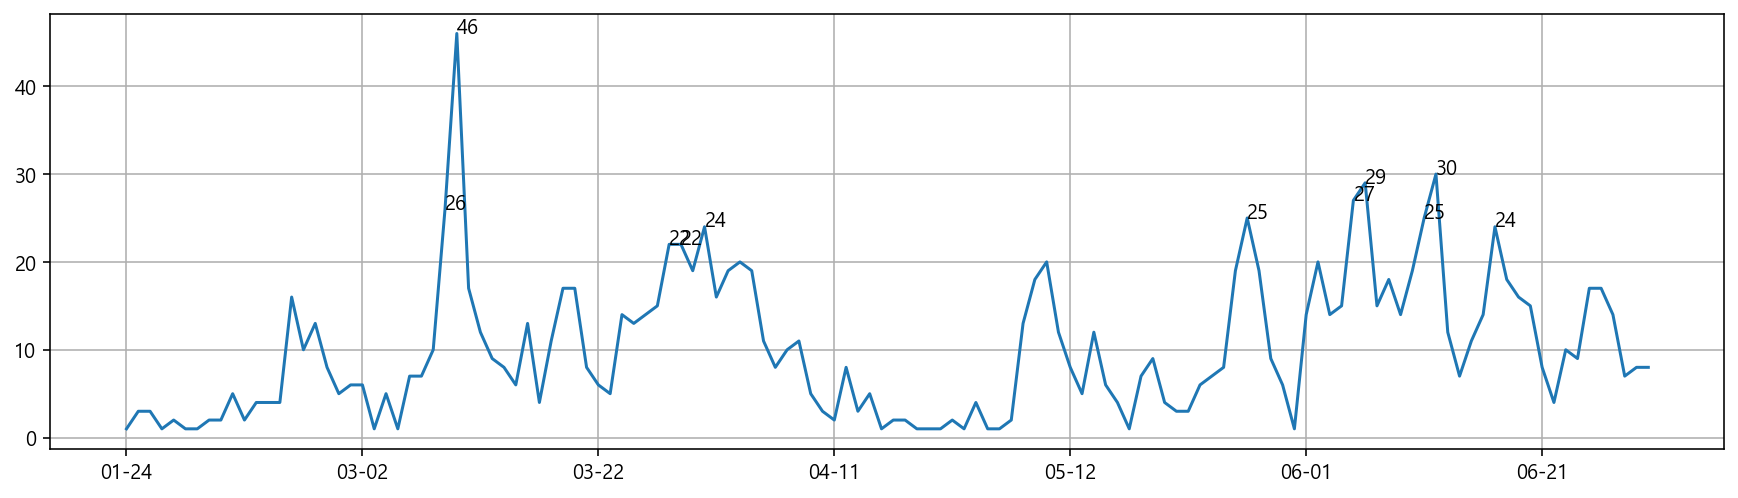

In [17]:
g = day_count.plot(figsize=(15, 4))
for i in range(len(day_count)):
    case_count = day_count.iloc[i]
    if case_count > 20:
        g.text(x=i, y=case_count, s=case_count)
plt.grid(True)

3월중에 46명 확진이 발생한 적이 있다!

## 확진자가 가장 많이 나온날

In [18]:
day_count

01-24     1
01-30     3
01-31     3
02-02     1
02-05     2
         ..
06-26    17
06-27    14
06-28     7
06-29     8
06-30     8
Name: 월일, Length: 130, dtype: int64

In [19]:
# 가장 많은 경우엔 하루에 46명도 있었음!
day_count.describe()

count    130.000000
mean      10.161538
std        7.917015
min        1.000000
25%        4.000000
50%        8.000000
75%       15.000000
max       46.000000
Name: 월일, dtype: float64

In [20]:
day_count[day_count == day_count.max()]

03-10    46
Name: 월일, dtype: int64

In [21]:
# 확진자가 가장 많았던 3월10일 데이터
df[df["월일"]=='03-10'].head()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일
1119,202,7567,3.10.,노원구,-,콜센터직원 접촉,서울의료원(퇴원),2020-03-10,3,11,03-10
1120,201,7711,3.10.,노원구,-,콜센터직원 접촉,서울의료원(퇴원),2020-03-10,3,11,03-10
1121,200,7555,3.10.,구로구,-,구로구 콜센터 관련,서남병원(퇴원),2020-03-10,3,11,03-10
1122,199,7725,3.10.,양천구,-,구로구 콜센터 관련,서남병원(퇴원),2020-03-10,3,11,03-10
1123,198,7539,3.10.,양천구,-,콜센터직원 접촉,서남병원(퇴원),2020-03-10,3,11,03-10


## 막대그래프 그리기

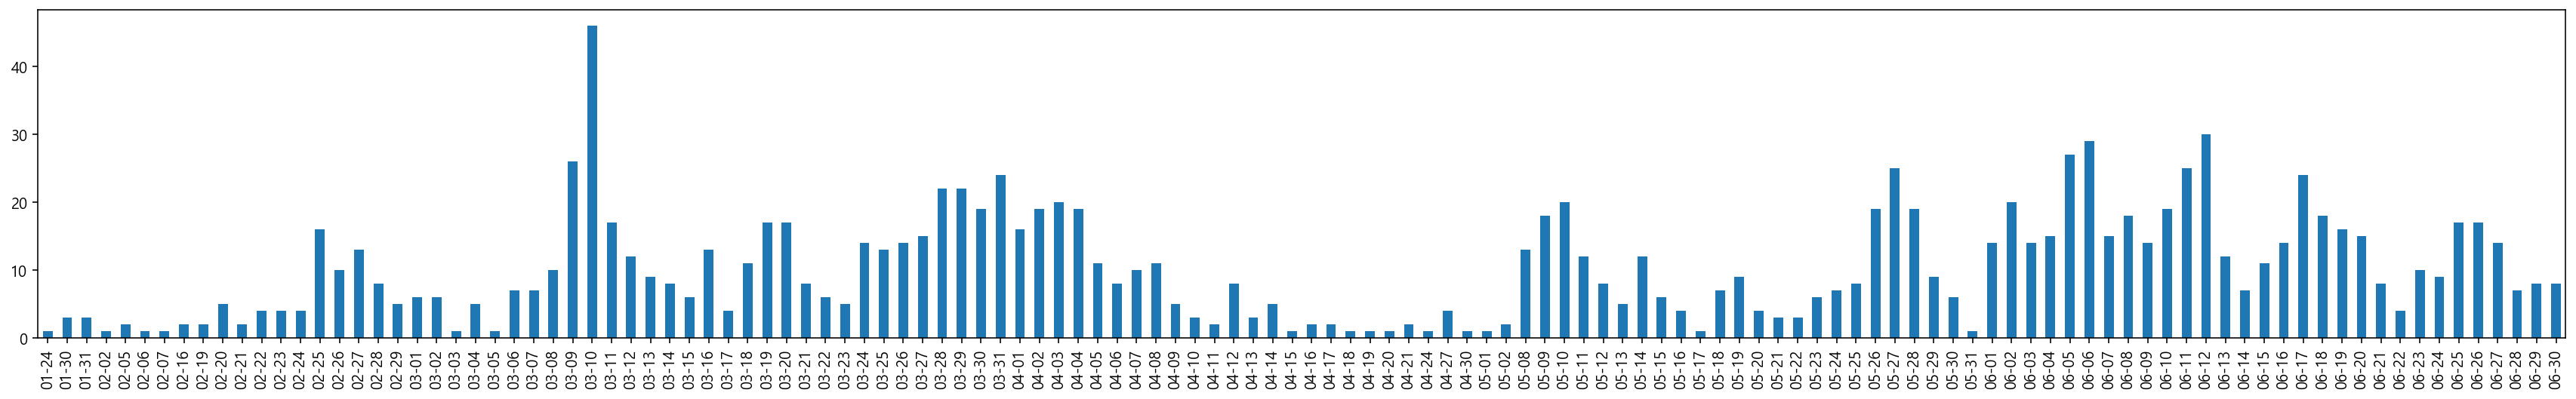

In [22]:
day_count.plot.bar(figsize=(30, 4))

3월10일이 확진자수가 가장 많은 것 확인

## 최근 데이터만 슬라이싱으로 나눠 그리기

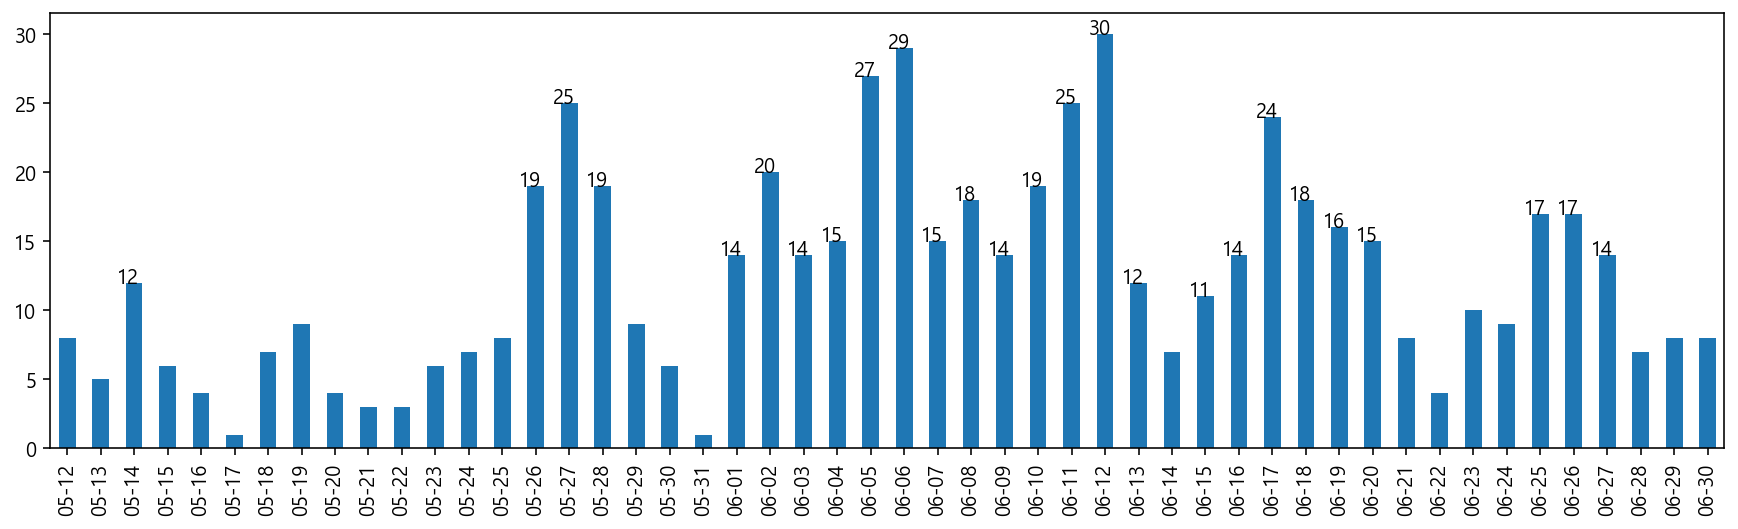

In [28]:
# 최근 50일 간의 추이만 시각화
g = day_count[-50:].plot.bar(figsize=(15,4))

for i in range(50):
    case_count = day_count[-50:].iloc[i]
    if case_count > 10:
        g.text(x=i-0.5, y=case_count, s=case_count)

최근 50일 동안에는 6월에 확진자수가 많아졌음

## 월별 확진자 수 그리기

In [29]:
df.sample()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일
232,1089,12015,6.12.,도봉구,-,요양시설 관련,서울의료원,2020-06-12,6,24,06-12


In [34]:
df["월"].value_counts()

1      7
2     80
3    391
4    156
5    228
6    459
Name: 월, dtype: int64

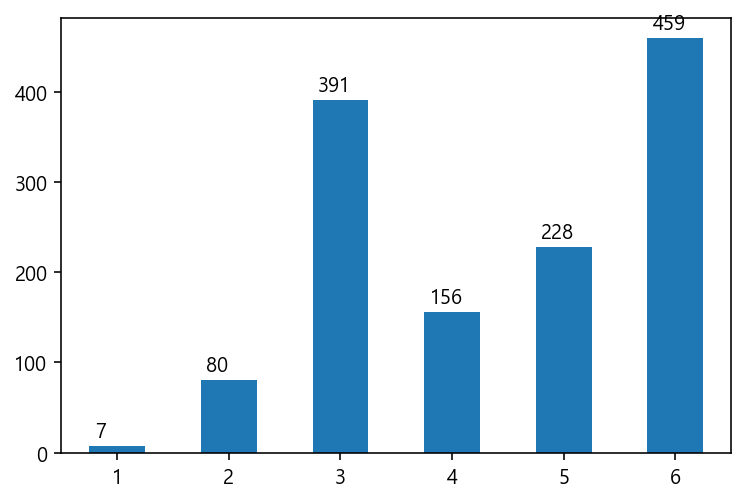

In [42]:
month_case = df["월"].value_counts().sort_index()
g = month_case.plot.bar(rot=0)

for i in range(len(month_case)):
    g.text(x=i-0.2, y=month_count.iloc[i]+10, s=month_count.iloc[i])

## 주단위 확진자 수 그리기

In [43]:
df.sample()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일
570,751,11092,5.19.,강북구,-,삼성서울병원 관련,서울삼성병원,2020-05-19,5,21,05-19


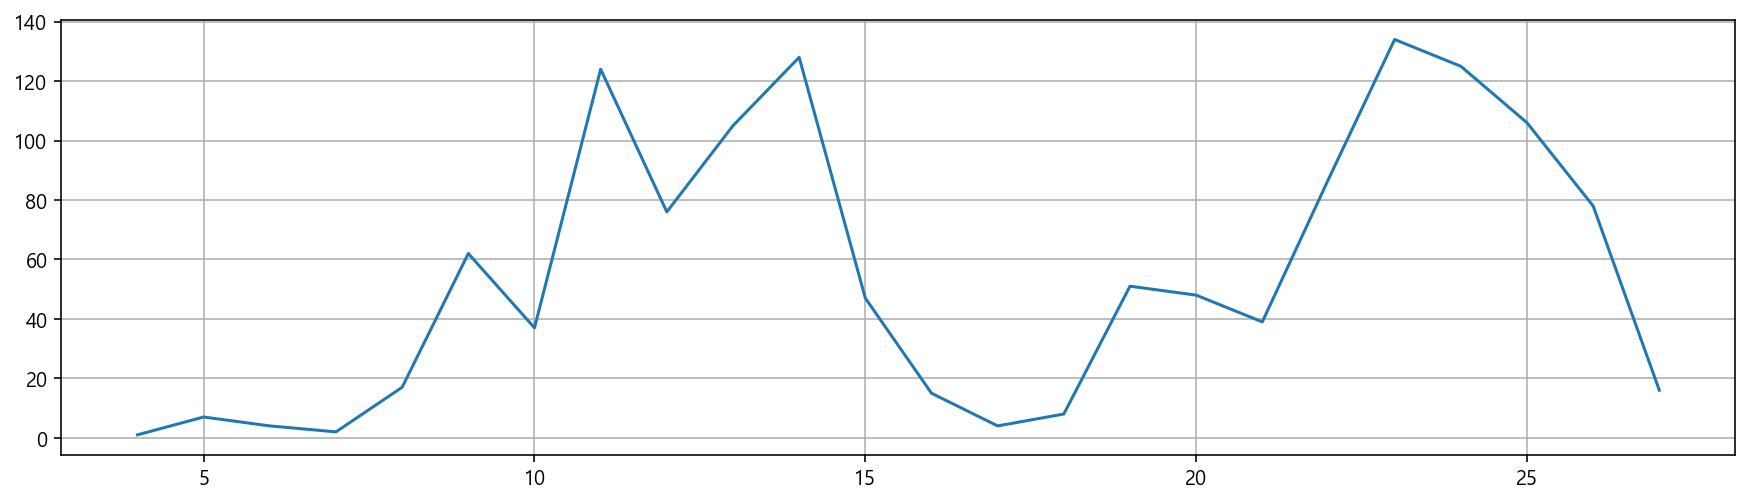

In [47]:
weekly_case = df["주"].value_counts().sort_index()
weekly_case.plot(figsize=(15, 4))
plt.grid(True)

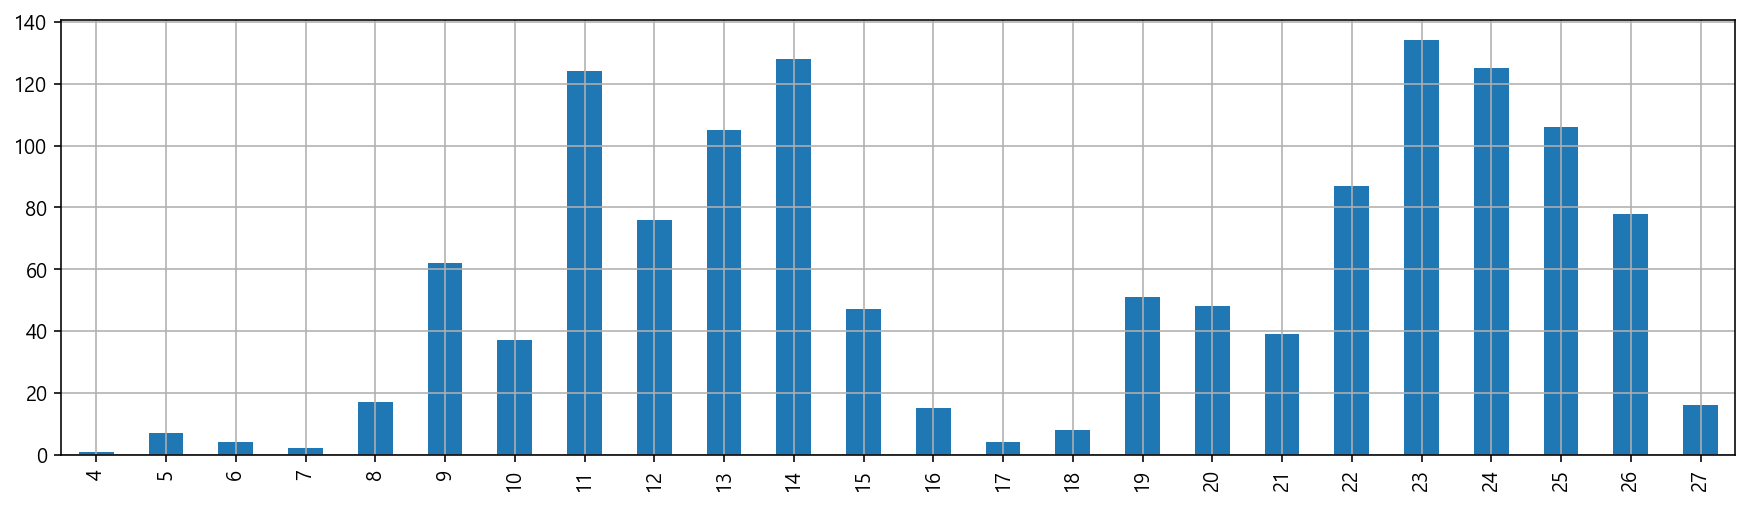

In [48]:
weekly_case = df["주"].value_counts().sort_index()
weekly_case.plot.bar(figsize=(15, 4))
plt.grid(True)

11주 이후로 확진자 발생 후 감소 -> 23주 이후로 확진자수 폭증 후 감소

## 월-주 함께 그리기

In [49]:
df.sample()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일
967,354,9194,3.25.,서초구,미국,해외 접촉 추정,보라매병원(퇴원),2020-03-25,3,13,03-25


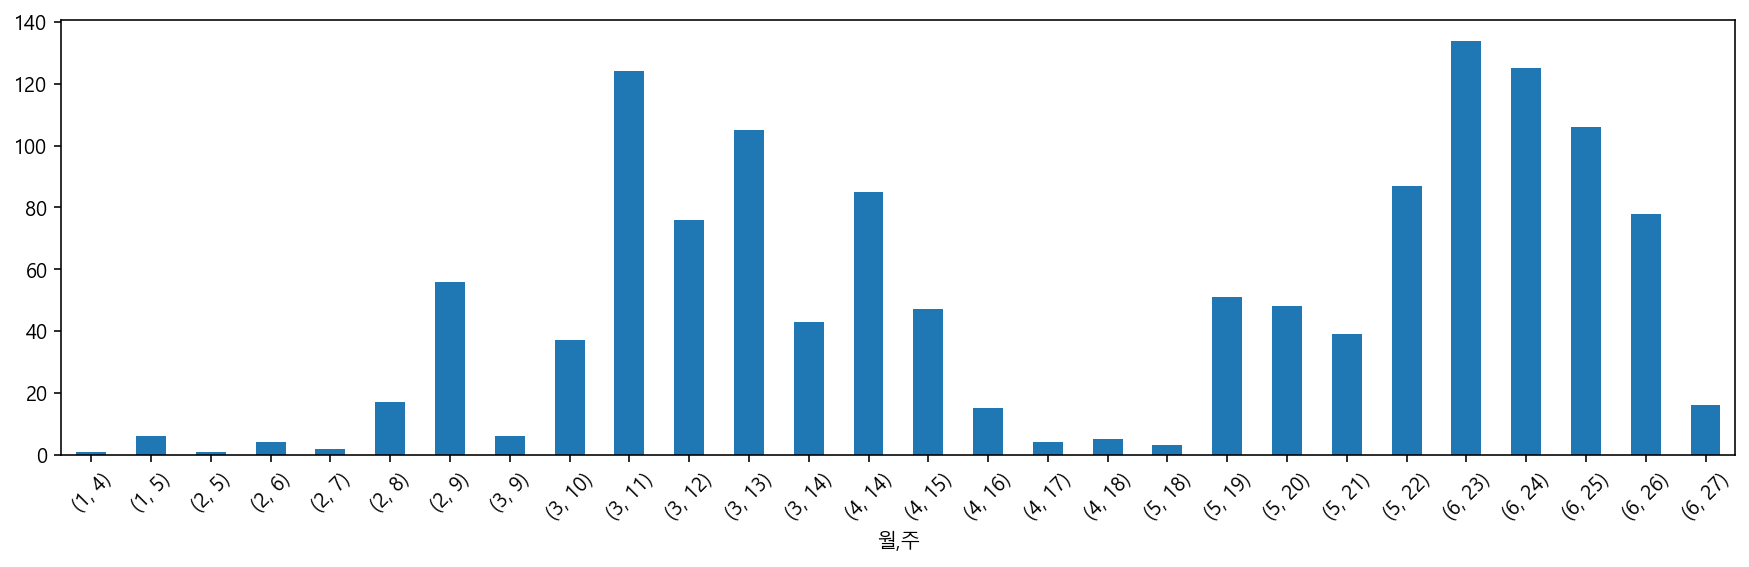

In [55]:
month_weekly_case = df[["월","주"]].value_counts().sort_index()
month_weekly_case.plot.bar(rot=45, figsize=(15, 4))

# 모든 날짜를 행에 만들어 주기
* 확진자가 없는 날의 데이터도 생성

In [56]:
df.sample()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일
1301,20,121,2.20.,성동구,-,성동구 아파트 관련,서울의료원(퇴원),2020-02-20,2,8,02-20


In [62]:
# 첫 번째 확진일자
%timeit first_day = df.iloc[-1, 7] # 7: 확진일자 칼럼 인덱스

48.3 µs ± 2.37 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [63]:
# 마지막 확진일자
%timeit last_day = df.iloc[0, 7]

50.1 µs ± 2.73 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## merge를 통해 전체 확진일자 만들기

# 누적 확진자 수 구하기

## 데이터프레임으로 그리기

## 시리즈로 그리기

## 확진수만 따로 그리기

## 누적확진만 따로 그리기

## 로그 스케일

## 확진월과 요일 구하기

# 요일별 확진 수

# 거주지별 확진자

# 접촉력

## 이태원 클럽 관련
내가 가진 데이터에 맞게 어떤거로 바꿔서 분석할 수 있을까?

## 감염결로 불명

# 가장 많은 전파가 일어난 ..